# Exploratory Data Analysis on Category Tree Dataset

In this notebook, we will perform exploratory data analysis (EDA) on the `category_tree.csv` dataset to understand its structure and contents.

## Loading the Dataset

We will load the dataset and display its basic information to understand its structure.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set plotting style
sns.set(style="whitegrid")
%matplotlib inline

# Define chunk size for large datasets
CHUNK_SIZE = 100000  # Process 100,000 rows at a time

# Display basic info about category_tree.csv (small enough to load fully)
category_tree = pd.read_csv("../data/category_tree.csv")
print("Category Tree Dataset Info:")
print(category_tree.info())

## Displaying the First Few Rows

## Now, let's take a look at the first few rows of the dataset to get a sense of what data we are working with.
print("\nFirst few rows:")
print(category_tree.head())

Category Tree Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1669 entries, 0 to 1668
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   categoryid  1669 non-null   int64  
 1   parentid    1644 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 26.2 KB
None

First few rows:
   categoryid  parentid
0        1016     213.0
1         809     169.0
2         570       9.0
3        1691     885.0
4         536    1691.0


## Basic Observations

- The `category_tree.csv` dataset has 1,669 rows with columns: `categoryid`, `parentid`.
- The `events.csv` and `item_properties.csv` datasets are large, so we'll process them in chunks to analyze user interactions and item properties.

Event Type Distribution:
view           2664312
addtocart        69332
transaction      22457
dtype: int64

Event Type Proportions:
view           0.966696
addtocart      0.025156
transaction    0.008148
dtype: float64


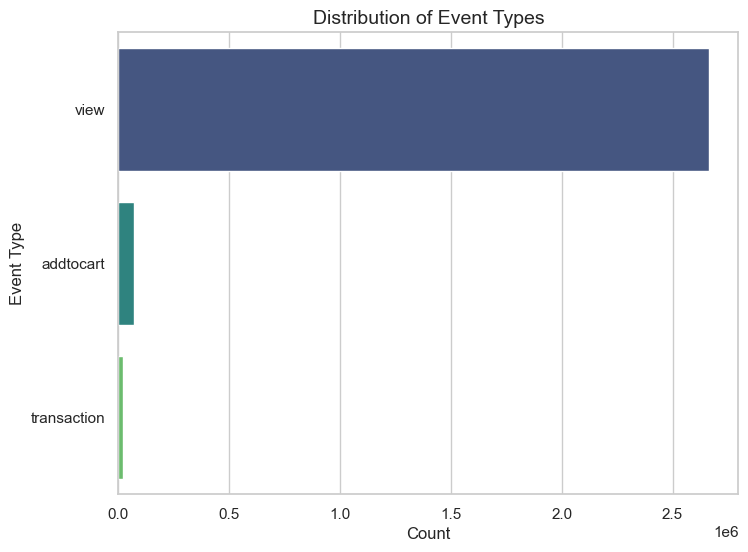

In [ ]:
import os  # Import os to handle directory operations

# Initialize counters for event types
event_counts = pd.Series(0, index=['view', 'addtocart', 'transaction'])

# Process events.csv in chunks
for chunk in pd.read_csv("../data/events.csv", chunksize=CHUNK_SIZE):
    # Count event types in this chunk
    chunk_counts = chunk['event'].value_counts()
    # Add to total counts
    event_counts = event_counts.add(chunk_counts, fill_value=0)

print("Event Type Distribution:")
print(event_counts)

# Plot event type distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=event_counts.values, y=event_counts.index, palette="viridis", hue=event_counts.index)  # Added hue parameter
plt.title("Distribution of Event Types", fontsize=14)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Event Type", fontsize=12)

# Create the visualizations directory if it doesn't exist
visualization_dir = "../visualizations/"
os.makedirs(visualization_dir, exist_ok=True)

# Save the figure
plt.savefig(os.path.join(visualization_dir, "event_distribution.png"))
plt.show()

# Calculate proportions
event_proportions = event_counts / event_counts.sum()
print("\nEvent Type Proportions:")
print(event_proportions)

## Event Type Insights

The distribution of event types in `events.csv` reveals a significant imbalance in user interactions, which poses a challenge for the recommendation system. Below is a detailed breakdown:

### Event Type Distribution
| Event Type     | Count      | Proportion |
|----------------|------------|------------|
| View           | 2,664,312  | 96.67%     |
| Add-to-Cart    | 69,332     | 2.52%      |
| Transaction    | 22,457     | 0.82%      |


### Key Observations
- **Views Dominate**: View events account for 96.7% of all interactions (2,664,312 events), indicating that most users browse items without taking further actions.
- **Low Conversion Rates**: Add-to-cart events make up 2.5% (69,332 events), and transactions are only 0.8% (22,457 events). This imbalance highlights the difficulty of predicting and encouraging conversions, a key challenge for the recommendation system.
- **Implications**: The system must focus on strategies to convert views into add-to-carts and transactions, possibly by prioritizing popular items or leveraging temporal patterns.

View to Add-to-Cart Rate: 2.60%
Add-to-Cart to Transaction Rate: 32.39%
View to Transaction Rate: 0.84%


C:\Users\hbempong\AppData\Local\Temp\ipykernel_26264\2479604151.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Stage', data=funnel_data, palette="Blues_d")


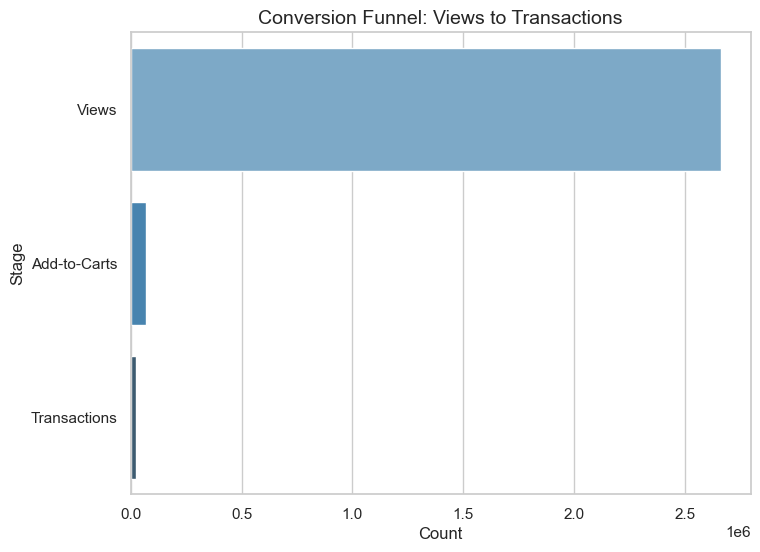

In [5]:
# Use event counts from previous step for conversion funnel
total_views = event_counts['view']
total_addtocarts = event_counts['addtocart']
total_transactions = event_counts['transaction']

view_to_addtocart_rate = total_addtocarts / total_views * 100
addtocart_to_transaction_rate = total_transactions / total_addtocarts * 100
view_to_transaction_rate = total_transactions / total_views * 100

print(f"View to Add-to-Cart Rate: {view_to_addtocart_rate:.2f}%")
print(f"Add-to-Cart to Transaction Rate: {addtocart_to_transaction_rate:.2f}%")
print(f"View to Transaction Rate: {view_to_transaction_rate:.2f}%")

# Plot conversion funnel
funnel_data = pd.DataFrame({
    'Stage': ['Views', 'Add-to-Carts', 'Transactions'],
    'Count': [total_views, total_addtocarts, total_transactions]
})

plt.figure(figsize=(8, 6))
sns.barplot(x='Count', y='Stage', data=funnel_data, palette="Blues_d")
plt.title("Conversion Funnel: Views to Transactions", fontsize=14)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Stage", fontsize=12)
plt.savefig("../visualizations/conversion_funnel.png")
plt.show()

## Conversion Funnel Insights

- Only 2.52% of views lead to add-to-carts, and 32.39% of add-to-carts result in transactions.
- The overall view-to-transaction rate is very low (0.82%), indicating a key challenge for the recommendation system: encouraging conversions.

Event Type Distribution:
view           2664312
addtocart        69332
transaction      22457
dtype: int64

Event Type Proportions:
view           0.966696
addtocart      0.025156
transaction    0.008148
dtype: float64


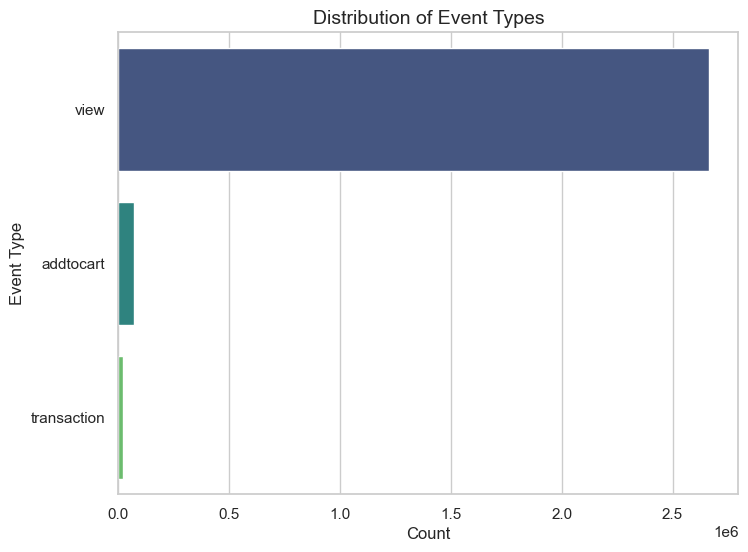

In [ ]:
import os  # Import os to handle directory operations

# Initialize counters for event types
event_counts = pd.Series(0, index=['view', 'addtocart', 'transaction'])

# Process events.csv in chunks
for chunk in pd.read_csv("../data/events.csv", chunksize=CHUNK_SIZE):
    # Count event types in this chunk
    chunk_counts = chunk['event'].value_counts()
    # Add to total counts
    event_counts = event_counts.add(chunk_counts, fill_value=0)

print("Event Type Distribution:")
print(event_counts)

# Plot event type distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=event_counts.values, y=event_counts.index, palette="viridis", hue=event_counts.index)  # Added hue parameter
plt.title("Distribution of Event Types", fontsize=14)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Event Type", fontsize=12)

# Create the visualizations directory if it doesn't exist
visualization_dir = "../visualizations/"
os.makedirs(visualization_dir, exist_ok=True)

# Save the figure
plt.savefig(os.path.join(visualization_dir, "event_distribution.png"))
plt.show()

# Calculate proportions
event_proportions = event_counts / event_counts.sum()
print("\nEvent Type Proportions:")
print(event_proportions)